In [2090]:
# **************************************************************************** #
#                                                                              #
#                                                         :::      ::::::::    #
#                                                       :+:      :+:    :+:    #
#                                                     +:+ +:+         +:+      #
#    By: luicasad <luicasad@student.42.fr>          +#+  +:+       +#+         #
#                                                 +#+#+#+#+#+   +#+            #
#    Created: 2023/10/22 11:17:16 by luicasad          #+#    #+#              #
#    Updated: 2023/10/22 11:17:24 by luicasad         ###   ########.fr        #
#                                                                              #
# **************************************************************************** #

# JUMP 2 DIGITAL

In [2091]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from sklearn.preprocessing import StandardScaler

home_dir = os.getcwd()
price_folder =  home_dir +'/data/price/'
accid_folder =  home_dir +'/data/accid/'
model_folder =  home_dir +'/data/model/'
shape_folder =  home_dir +'/data/shape/'
media_folder =  home_dir +'/media/'


price_path = price_folder + 'prices_14_23.csv'
accid_path = accid_folder + 'accidents_trimestrals_16_22.csv'
model_path = model_folder + 'pca_model.csv'
shape_path = shape_folder + 'bcn_barris'


<span style='color:red'> Augmenta l'amplada del quadern jupyter<br> </span><span style='color:green'> Aumento el ancho del cuaderno Jupyter<br></span><span style='color:blue'> Increase the width of jupyter notebook <br></span>

In [2092]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100%}</style>"))

In [2093]:
def save_preprocessed(df:pd.DataFrame,path:str):
    """
    df: the DataFrame to save
    path: the folder and  filename to save it
    """
	# Save data
    print("Saving {} ....".format(path))
    df.to_csv(path, index= False)
    print("Saved {} records with {} columns".format(df.shape[0], df.shape[1]))


def	print_head_tail(df:pd.DataFrame, rows:int=6):
    """
    Shows 6 records from a DataFrame. 3 first ones & 3 last ones.
    """
    list = []
    for i in range(rows//2):
        list.append(i)
    for i in range ((-1 * rows//2), 0):
        list.append(i)
    print(df.iloc[list])

def count_NAN(df:pd.DataFrame):
    """
    Count NAN values in each column of a dataset.
    Print 8 counts in per line
    """
    col_counter = 1
    for col in df.columns:
        count = df[col].isna().sum()
        if ((col_counter % 8) == 0):
            sep = "|\n"
        else:
            sep = "| "
        print("|{} = {}".format(col,count), end=sep)
        col_counter = col_counter + 1


def minus_one(df:pd.DataFrame):
    """
    Count -1 values in each column of a dataset.
    Print 8 counts in per line
    """
    col_counter = 1
    for col in df.columns[:-1]:
        count = df[df[col] == -1][col].count()
        if ((col_counter % 8) == 0):
            sep = "|\n"
        else:
            sep = "| "
        print("|{} = {}".format(col,count), end=sep)
        col_counter = col_counter + 1


def create_date_from(year:int, quarter:int)-> str:
    """
    GETS:
    year: a four digit number
    quarter : an integer ranging 1 to 4

    Returns:
    A string date with this format YYYY-MM-DD, where DD refers always to first month day

    OPERATES
    For quarter 1 returns month 1
    For quarter 2 returns month 4
    For quarter 3 returns month 7
    For quarter 4 returns month 10
    """
    month = ((quarter - 1) * 3) + 1
    return str(year) + "-" f"{month:02}"+ "-01"



 


def concat_files(data_folder:str, years: range, common_name:str )-> pd.DataFrame:

    #For each year, 
    #   create a dataframe reading a csv file.
    #       At reading time transform "Preu" string into float. And consider "--" strings as NaN.
    #   Append it to a list
    #   Create a dataframe with columns count

    files = []
    counts =[]
    for year in years:
        file = data_folder + str(year) + common_name
        df = pd.read_csv(file, dtype={"Preu":np.float64}, na_values="--")
        files.append(df)
        counts.append(pd.DataFrame(data=df.count(), columns=[year]))
        print(df.shape)
        print(df.columns)
    summary = pd.concat(counts, axis=1)
    difference = summary.iloc(0)[0]-summary.iloc(0)[-1]
    print(type(summary), type(difference))
    print(summary)
    print("-"*80)
    print("Any - Preu = NUM NaN")
    print(difference.to_frame().T)
    return pd.concat(files, ignore_index=True)

def concat_accid_files(data_folder:str, \
                       years: range, \
                       common_name:str, \
                       headers:list, \
                       field_types:dict)-> pd.DataFrame:
    """
    OPERATES
        For each year:
            Create a dataframe reading a csv file.
            Set DataFrame Headers
            Append it to a list
            Create a dataframe with columns count
    RETURNS
        The vertical concatenation of all DataFrames 
    """


    files = []
    counts =[]
    for year in years:
        file = data_folder + str(year) + common_name
        df = pd.read_csv(file, dtype=field_types)
        df.columns = headers
        files.append(df)
        counts.append(pd.DataFrame(data=df.count(), columns=[year]))
    return pd.concat(files, ignore_index=True)
 

# <span style='color:red'> Preprocessament<br> </span><span style='color:green'> Preprocesamiento<br></span><span style='color:blue'> Preprocess<br></span>

## <span style='color:red'> Preus<br> </span><span style='color:green'> Precios<br></span><span style='color:blue'> Prices<br></span>

### <span style='color:red'> Llegir i concatenar fitxers de preus<br> </span><span style='color:green'> Lectura y concatenación de los archivos de precios<br></span><span style='color:blue'> Read and concatenate all prize files <br></span>

In [2094]:
pd.set_option("display.width", 120)
price = concat_files(price_folder, range(2014, 2024),"_lloguer_preu_trim.csv")


(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Lloguer_mitja', 'Preu'], dtype='object')
(584, 8)
Index(['Any

In [2095]:
print("Original Dataset has {} rows with {} columns.".format(price.shape[0],price.shape[1]))

Original Dataset has 5402 rows with 8 columns.


### <span style='color:red'> Dos tipus de preus (Eur_mes & Eur_m2_mes) a la mateixa columna: Separem-los<br> </span><span style='color:green'> Dos tipos de precios (Eur_mes & Eur_m2_mes) en la misma columna: Separémoslos<br></span><span style='color:blue'> Two types of prices (Eur_mes & Eur_m2_mes) on same column: Let's split it in two columns<br></span>

In [2096]:
price["Lloguer_mitja"].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

In [2097]:
#Create key for future join
price=price.assign(
    Clau=price[["Codi_Barri", "Any", "Trimestre"]].apply(
        lambda row: ''.join([str(each) for each in row]),axis=1))

In [2098]:
#Split dataset in two, each having rows of same price type.
#First for Eur
df_eur = price[price["Lloguer_mitja"] == 'Lloguer mitjà mensual (Euros/mes)']
df_eur = df_eur.rename(columns={"Preu": "Eur"})
#then for Eur_m2
df_eur_m2 = price[price["Lloguer_mitja"] == 'Lloguer mitjà per superfície (Euros/m2 mes)']
df_eur_m2 = df_eur_m2.rename(columns={"Preu": "Eur_m2"})
#only need two columns form df_eur_m2 to joint into previous DataFrame.
df_to_join = df_eur_m2[["Clau","Eur_m2"]]

In [2099]:
#merge two datasets
price = pd.merge(df_eur, df_to_join, on="Clau")
price= price.drop(["Codi_Districte", "Codi_Barri", "Lloguer_mitja"], axis = 1)
#price["Eur"]=pd.to_numeric(price["Eur"])
print_head_tail(price)

       Any  Trimestre Nom_Districte                 Nom_Barri      Eur     Clau  Eur_m2
0     2014          1  Ciutat Vella                  el Raval   589.55   120141   10.76
1     2014          1  Ciutat Vella            el Barri Gòtic   712.79   220141   10.58
2     2014          1  Ciutat Vella            la Barceloneta   540.71   320141   14.40
2698  2023          2    Sant Martí   Provençals del Poblenou  1204.20  7120232   16.70
2699  2023          2    Sant Martí  Sant Martí de Provençals   960.90  7220232   13.20
2700  2023          2    Sant Martí       la Verneda i la Pau   991.10  7320232   14.50


In [2100]:
print("Dataset with two price columns has {} rows with {} columns.".format(price.shape[0],price.shape[1]))

Dataset with two price columns has 2701 rows with 7 columns.


### <span style='color:red'> Estudi dels valors Nan<br> </span><span style='color:green'> Estudio de los valores nulos<br></span><span style='color:blue'> Study Nan values <br></span>

In [2101]:
count_NAN(price)

|Any = 0| |Trimestre = 0| |Nom_Districte = 0| |Nom_Barri = 0| |Eur = 184| |Clau = 0| |Eur_m2 = 186| 

In [2102]:
grouped_df = price[price["Eur_m2"].isna()
                  ].groupby(['Any', 'Trimestre']).size().unstack()
pd.set_option('display.max_rows', None)
print("Trimestre    1      2      3      4   sum")
for row in grouped_df.iterrows():
    print("{}     ".format(row[0]), end=" ")
    suma = 0
    for data in row[1].values:
        print("{0:4}  ".format(data), end = " ")
        if (data != np.nan):
            suma += data
    print("{0:4}  ".format(suma), end = " ")
    print("{0:.2f}%  ".format(100*suma/292))



Trimestre    1      2      3      4   sum
2014       5.0    3.0    5.0    6.0   19.0   6.51%  
2015       6.0    2.0    4.0    4.0   16.0   5.48%  
2016       2.0    5.0    5.0    4.0   16.0   5.48%  
2017       5.0    4.0    5.0    5.0   19.0   6.51%  
2018       6.0    5.0    6.0    5.0   22.0   7.53%  
2019       6.0    6.0    6.0    5.0   23.0   7.88%  
2020       4.0    7.0    6.0    6.0   23.0   7.88%  
2021       6.0    5.0    6.0    5.0   22.0   7.53%  
2022       6.0    5.0    5.0    nan    nan   nan%  
2023       5.0    5.0    nan    nan    nan   nan%  


In [2103]:
Barris_with_NaN =price[price["Eur"].isna()]["Nom_Barri"].unique()
Capitalized = [s.capitalize() for s in Barris_with_NaN]

print("Barris amb preus NaN ==>", Capitalized)


Barris amb preus NaN ==> ['La marina del prat vermell', 'La clota', 'Torre baró', 'Vallbona', 'Baró de viver', 'Can peguera', 'Canyelles']


In [2104]:
NaN_prices = price[price["Eur_m2"].isna()]
#print(NaN_prices)
Nan_prices_summary = NaN_prices.groupby(['Nom_Barri']).count()
pd.set_option('display.max_rows', None)
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 27
Can Peguera                   32
Canyelles                      3
Torre Baró                    24
Vallbona                      34
la Clota                      36
la Marina del Prat Vermell    30
Name: Any, dtype: int64


### <span style='color:red'> Substitució dels valors Nan<br> </span><span style='color:green'> Substitución de los valores nulos<br></span><span style='color:blue'> Nan values <br></span>

In [2105]:
# Only for Canyelles cause it is the barri with less missed data.
# There are two types of prices:
# First we deal with price in eur/month
Canyelles = (price["Nom_Barri"] == 'Canyelles')
print(price[Canyelles][["Nom_Barri", "Any", "Trimestre",  "Eur"]])

      Nom_Barri   Any  Trimestre     Eur
48    Canyelles  2014          1  563.33
121   Canyelles  2014          2  474.29
194   Canyelles  2014          3  532.67
267   Canyelles  2014          4  566.36
340   Canyelles  2015          1     NaN
413   Canyelles  2015          2  575.83
486   Canyelles  2015          3  558.00
559   Canyelles  2015          4  598.04
632   Canyelles  2016          1  619.85
705   Canyelles  2016          2  621.43
778   Canyelles  2016          3  648.75
851   Canyelles  2016          4  617.52
924   Canyelles  2017          1  689.62
997   Canyelles  2017          2  677.50
1070  Canyelles  2017          3  701.50
1143  Canyelles  2017          4  656.15
1216  Canyelles  2018          1  714.68
1289  Canyelles  2018          2  661.88
1362  Canyelles  2018          3  715.45
1435  Canyelles  2018          4  774.38
1508  Canyelles  2019          1  791.90
1581  Canyelles  2019          2  756.40
1654  Canyelles  2019          3  714.40
1727  Canyelles 

In [2106]:
# Only for Canyelles cause it is the barri with less missed data
price.loc[Canyelles,"Eur"] = price[Canyelles]["Eur"].fillna(price[Canyelles]["Eur"].rolling(3,min_periods=1).mean())
print(price[price["Nom_Barri"] == 'Canyelles'][["Nom_Barri", "Any", "Trimestre",  "Eur"]])

      Nom_Barri   Any  Trimestre      Eur
48    Canyelles  2014          1  563.330
121   Canyelles  2014          2  474.290
194   Canyelles  2014          3  532.670
267   Canyelles  2014          4  566.360
340   Canyelles  2015          1  549.515
413   Canyelles  2015          2  575.830
486   Canyelles  2015          3  558.000
559   Canyelles  2015          4  598.040
632   Canyelles  2016          1  619.850
705   Canyelles  2016          2  621.430
778   Canyelles  2016          3  648.750
851   Canyelles  2016          4  617.520
924   Canyelles  2017          1  689.620
997   Canyelles  2017          2  677.500
1070  Canyelles  2017          3  701.500
1143  Canyelles  2017          4  656.150
1216  Canyelles  2018          1  714.680
1289  Canyelles  2018          2  661.880
1362  Canyelles  2018          3  715.450
1435  Canyelles  2018          4  774.380
1508  Canyelles  2019          1  791.900
1581  Canyelles  2019          2  756.400
1654  Canyelles  2019          3  

In [2107]:
# Second we deal with price in eur_m2/month
# Only for Canyelles cause it is the barri with less missed ata
Canyelles = (price["Nom_Barri"] == 'Canyelles')
price.loc[Canyelles,"Eur_m2"] = price[Canyelles]["Eur_m2"].fillna(price[Canyelles]["Eur_m2"].rolling(3,min_periods=1).mean())


<span style='color:red'> Podem veure que el Barri de Canyelles (49) ara no té NaNs<br> </span><span style='color:green'> Podemos ver que el Barrio de Canyelles (49) ahora no tiene NaNs<br></span><span style='color:blue'> We can see that the Canyelles neighborhood (49) now has no NaNs <br></span>

In [2108]:
NaN_prices = price[price["Eur"].isna()]
#print(NaN_prices)
Nan_prices_summary = NaN_prices.groupby(['Nom_Barri']).count()
pd.set_option('display.max_rows', None)
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 27
Can Peguera                   32
Torre Baró                    23
Vallbona                      34
la Clota                      36
la Marina del Prat Vermell    29
Name: Any, dtype: int64


In [2109]:
NaN_prices = price[price["Eur_m2"].isna()]
#print(NaN_prices)
Nan_prices_summary = NaN_prices.groupby(['Nom_Barri']).count()
pd.set_option('display.max_rows', None)
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 27
Can Peguera                   32
Torre Baró                    24
Vallbona                      34
la Clota                      36
la Marina del Prat Vermell    30
Name: Any, dtype: int64


In [2110]:

NaN_barris = price[price["Eur_m2"].isna()]["Nom_Barri"].unique()
barris_NaN = price[price["Nom_Barri"].isin(NaN_barris)]
Nan_prices_summary = barris_NaN.groupby(['Nom_Barri']).count()
print(Nan_prices_summary["Any"])

Nom_Barri
Baró de Viver                 37
Can Peguera                   37
Torre Baró                    37
Vallbona                      37
la Clota                      37
la Marina del Prat Vermell    37
Name: Any, dtype: int64


<span style='color:red'> Suprimem registres de barris amb més NaN que dades<br> </span><span style='color:green'> Borramos los registros de los barrios con más NaNs que datos<br></span><span style='color:blue'> We delete records from neighborhoods with more NaNs than data <br></span>

In [2111]:
drop_barris = price[price["Eur"].isna()]["Nom_Barri"].unique()
drop_mask = (price['Nom_Barri'].isin(drop_barris))
price.drop(price[drop_mask].index, inplace = True)
print("Dataset Without neighborhoods with NaNs has {} rows with {} columns.".format(price.shape[0],price.shape[1]))

Dataset Without neighborhoods with NaNs has 2479 rows with 7 columns.


In [2112]:
price=price.assign(
    Date=price[["Any", "Trimestre"]].apply(
        lambda row: pd.to_datetime(create_date_from(row.iloc[0], row.iloc[1])),axis=1))
#Calculate average flat size
price["m2"] = price["Eur"].div(price["Eur_m2"])

In [2113]:
print_head_tail(price)

       Any  Trimestre Nom_Districte                 Nom_Barri      Eur     Clau  Eur_m2       Date         m2
0     2014          1  Ciutat Vella                  el Raval   589.55   120141   10.76 2014-01-01  54.790892
1     2014          1  Ciutat Vella            el Barri Gòtic   712.79   220141   10.58 2014-01-01  67.371456
2     2014          1  Ciutat Vella            la Barceloneta   540.71   320141   14.40 2014-01-01  37.549306
2698  2023          2    Sant Martí   Provençals del Poblenou  1204.20  7120232   16.70 2023-04-01  72.107784
2699  2023          2    Sant Martí  Sant Martí de Provençals   960.90  7220232   13.20 2023-04-01  72.795455
2700  2023          2    Sant Martí       la Verneda i la Pau   991.10  7320232   14.50 2023-04-01  68.351724


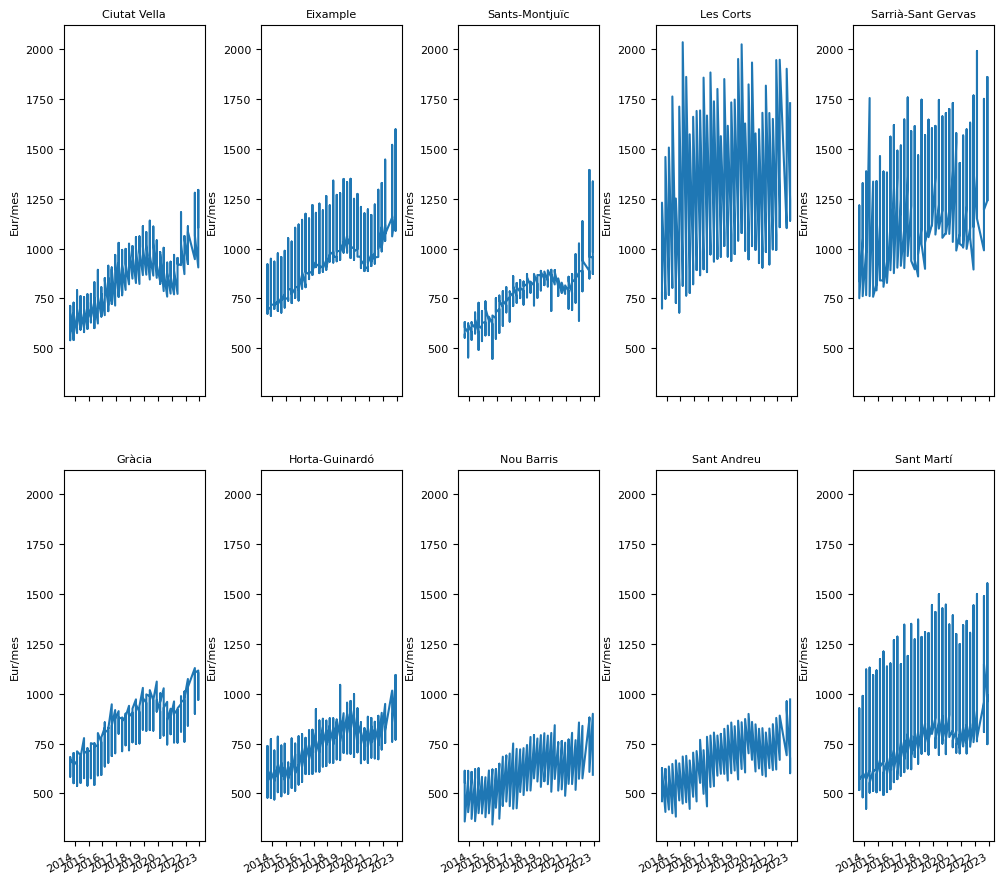

In [2114]:

barris = price["Nom_Districte"].unique()
min_price = price["Eur"].min()
max_price = price["Eur"].max()
quarter_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
fig, axs = plt.subplots(2, 5, figsize=(12, 12))
plt.subplots_adjust(wspace=0.4)
for ax, barri in zip(axs.flat, barris):
    ax.tick_params(labelsize=8)
    ax.set_ylabel("Eur/mes", fontsize=8)
    ax.plot(price[price["Nom_Districte"] == barri]["Date"],price[price["Nom_Districte"] == barri]["Eur"])
    ax.xaxis.set_major_locator(quarter_locator)
    ax.xaxis.set_major_formatter(year_month_formatter)
    ax.yaxis.set_data_interval(min_price,max_price)
    ax.set_title("{}".format(barri[:18]), fontsize=8)
fig.autofmt_xdate()
fig.savefig(media_folder + "Trellis_districtes_eur.png")

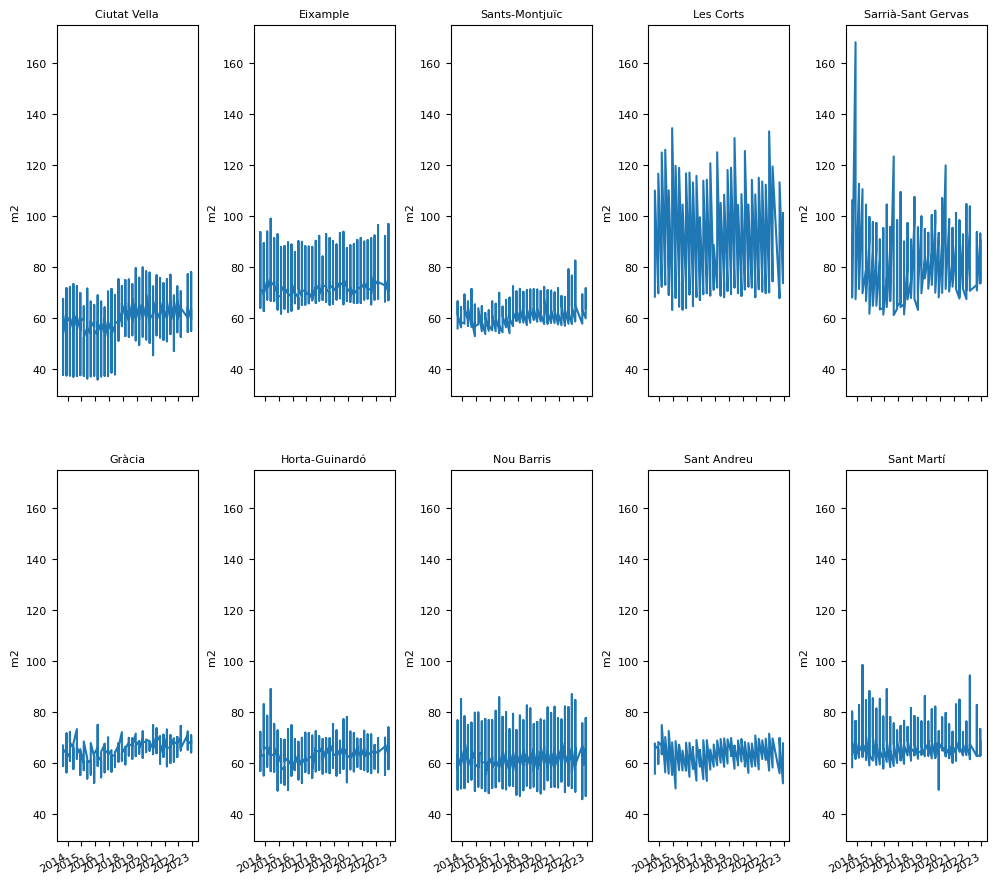

In [2115]:

barris = price["Nom_Districte"].unique()
min_price = price["m2"].min()
max_price = price["m2"].max()
quarter_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
fig, axs = plt.subplots(2, 5, figsize=(12, 12))
plt.subplots_adjust(wspace=0.4)
for ax, barri in zip(axs.flat, barris):
    ax.tick_params(labelsize=8)
    ax.set_ylabel("m2", fontsize=8)
    ax.plot(price[price["Nom_Districte"] == barri]["Date"],price[price["Nom_Districte"] == barri]["m2"])
    ax.xaxis.set_major_locator(quarter_locator)
    ax.xaxis.set_major_formatter(year_month_formatter)
    ax.yaxis.set_data_interval(min_price,max_price)
    ax.set_title("{}".format(barri[:18]), fontsize=8)
fig.autofmt_xdate()
fig.savefig(media_folder + "Trellis_districtes_m2.png")

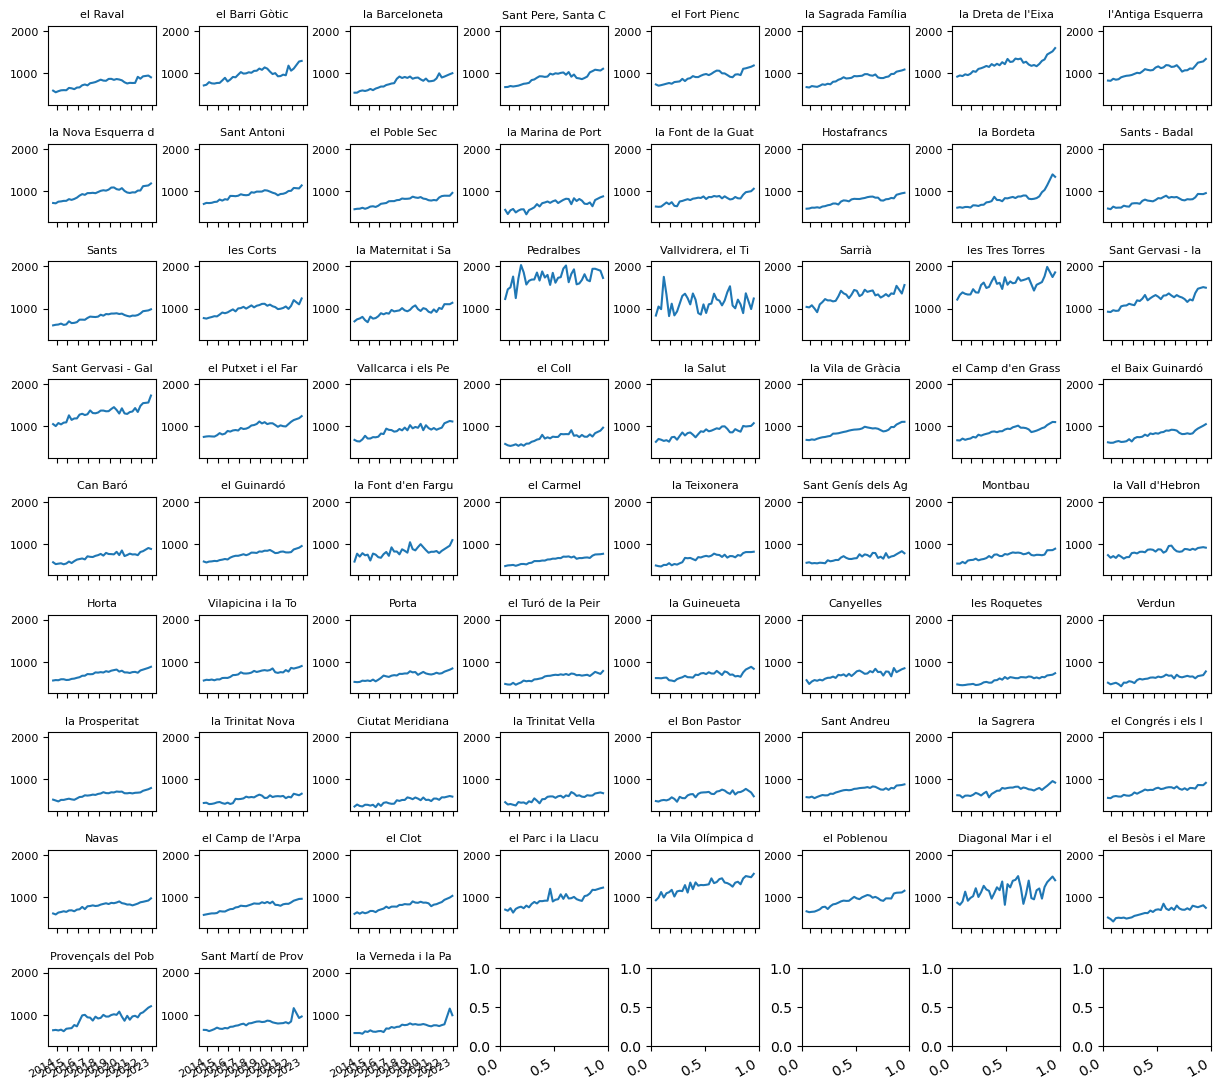

In [2116]:
barris = price["Nom_Barri"].unique()
min_price = price["Eur"].min()
max_price = price["Eur"].max()
quarter_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
fig, axs = plt.subplots(9, 8, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5,wspace=0.4)
for ax, barri in zip(axs.flat, barris):
    ax.tick_params(labelsize=8)
    ax.plot(price[price["Nom_Barri"] == barri]["Date"],price[price["Nom_Barri"] == barri]["Eur"])
    ax.xaxis.set_major_locator(quarter_locator)
    ax.xaxis.set_major_formatter(year_month_formatter)
    ax.yaxis.set_data_interval(min_price,max_price)
    ax.set_title("{}".format(barri[:18]),fontsize=8)
fig.autofmt_xdate()
fig.savefig(media_folder + "Trellis_barris_eur.png")

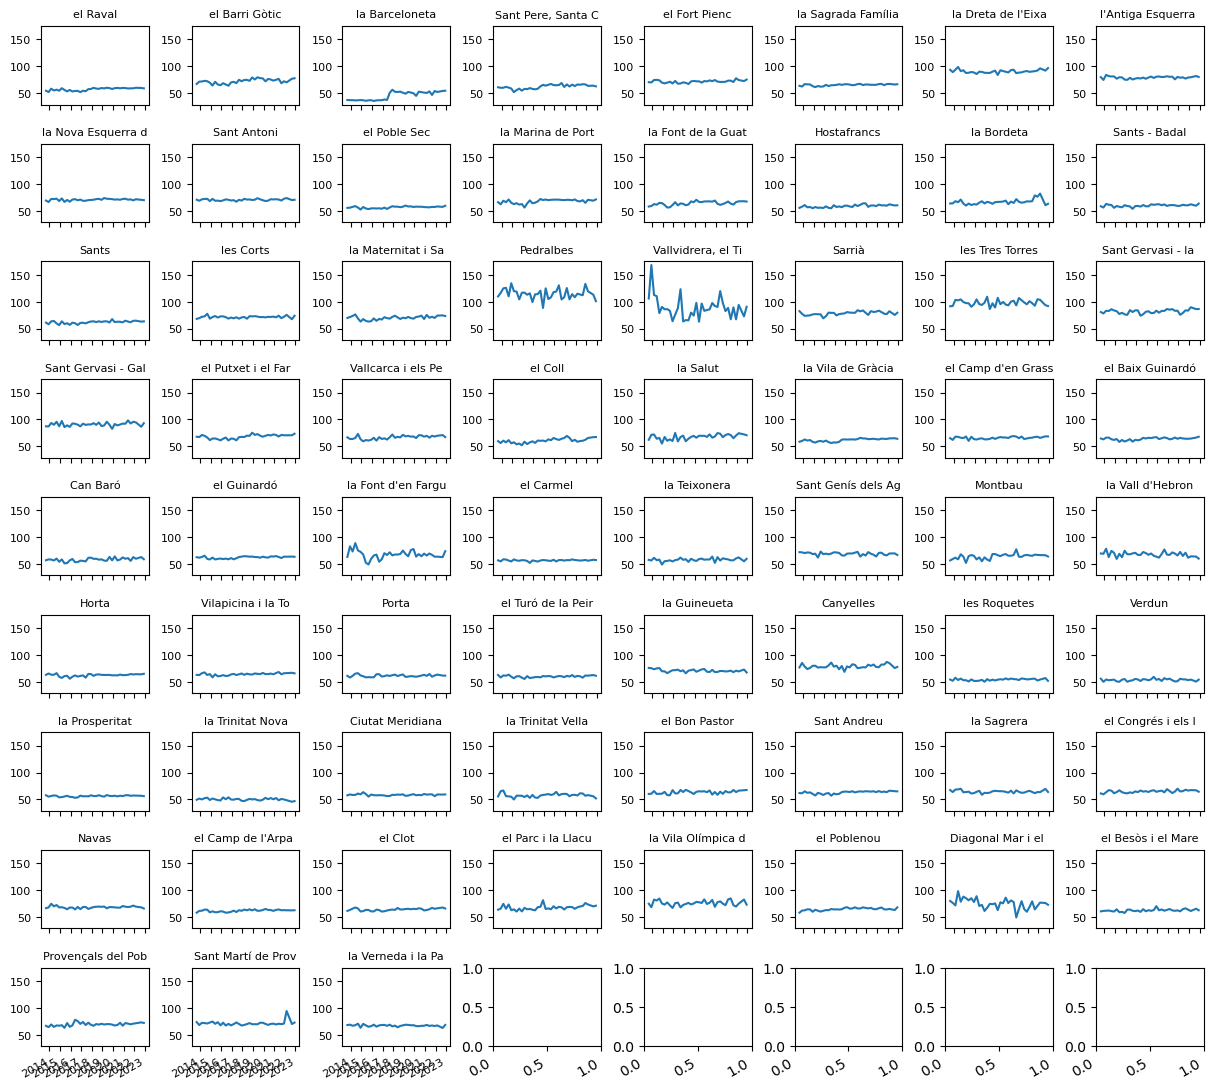

In [2117]:
barris = price["Nom_Barri"].unique()
min_price = price["m2"].min()
max_price = price["m2"].max()
quarter_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter("%Y") # four digits for year, two for month
fig, axs = plt.subplots(9, 8, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5,wspace=0.4)
for ax, barri in zip(axs.flat, barris):
    ax.tick_params(labelsize=8)
    ax.plot(price[price["Nom_Barri"] == barri]["Date"],price[price["Nom_Barri"] == barri]["m2"])
    ax.xaxis.set_major_locator(quarter_locator)
    ax.xaxis.set_major_formatter(year_month_formatter)
    ax.yaxis.set_data_interval(min_price,max_price)
    ax.set_title("{}".format(barri[:18]),fontsize=8)
fig.autofmt_xdate()
fig.savefig(media_folder + "Trellis_barris_m2.png")

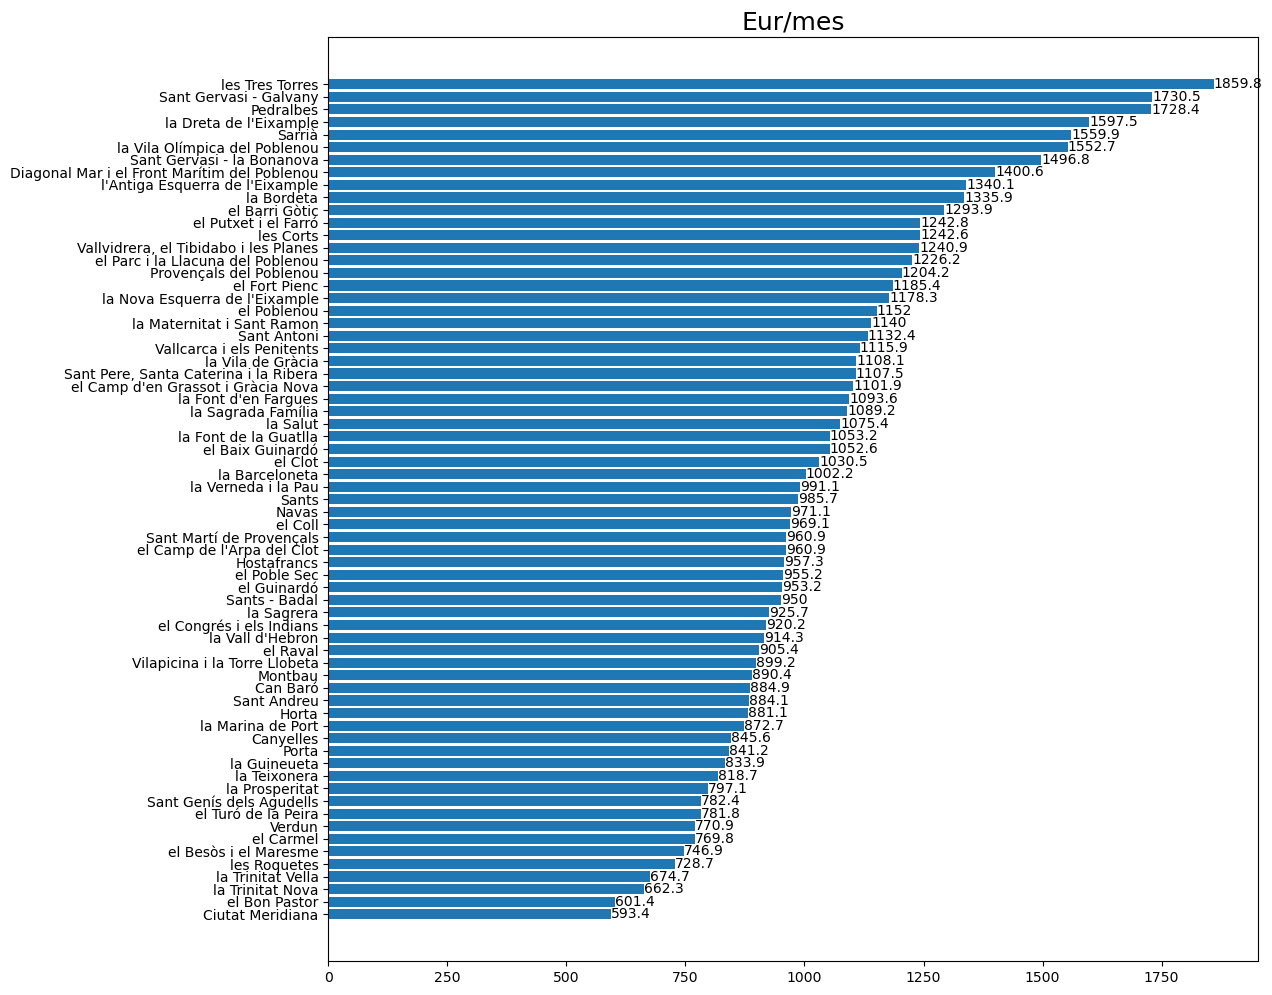

In [2118]:
fig, axs = plt.subplots(figsize=(12, 12))
any=2023
trim=2
mask = (price["Any"] == any) &(price["Trimestre"] == trim)
plot_dataframe =  price[mask].sort_values(by="Eur")
bars= axs.barh(plot_dataframe['Nom_Barri'], plot_dataframe['Eur'])
axs.bar_label(bars)
axs.set_title("Eur/mes",fontsize=18)
fig.savefig(media_folder + "barris_rank_eur.png")

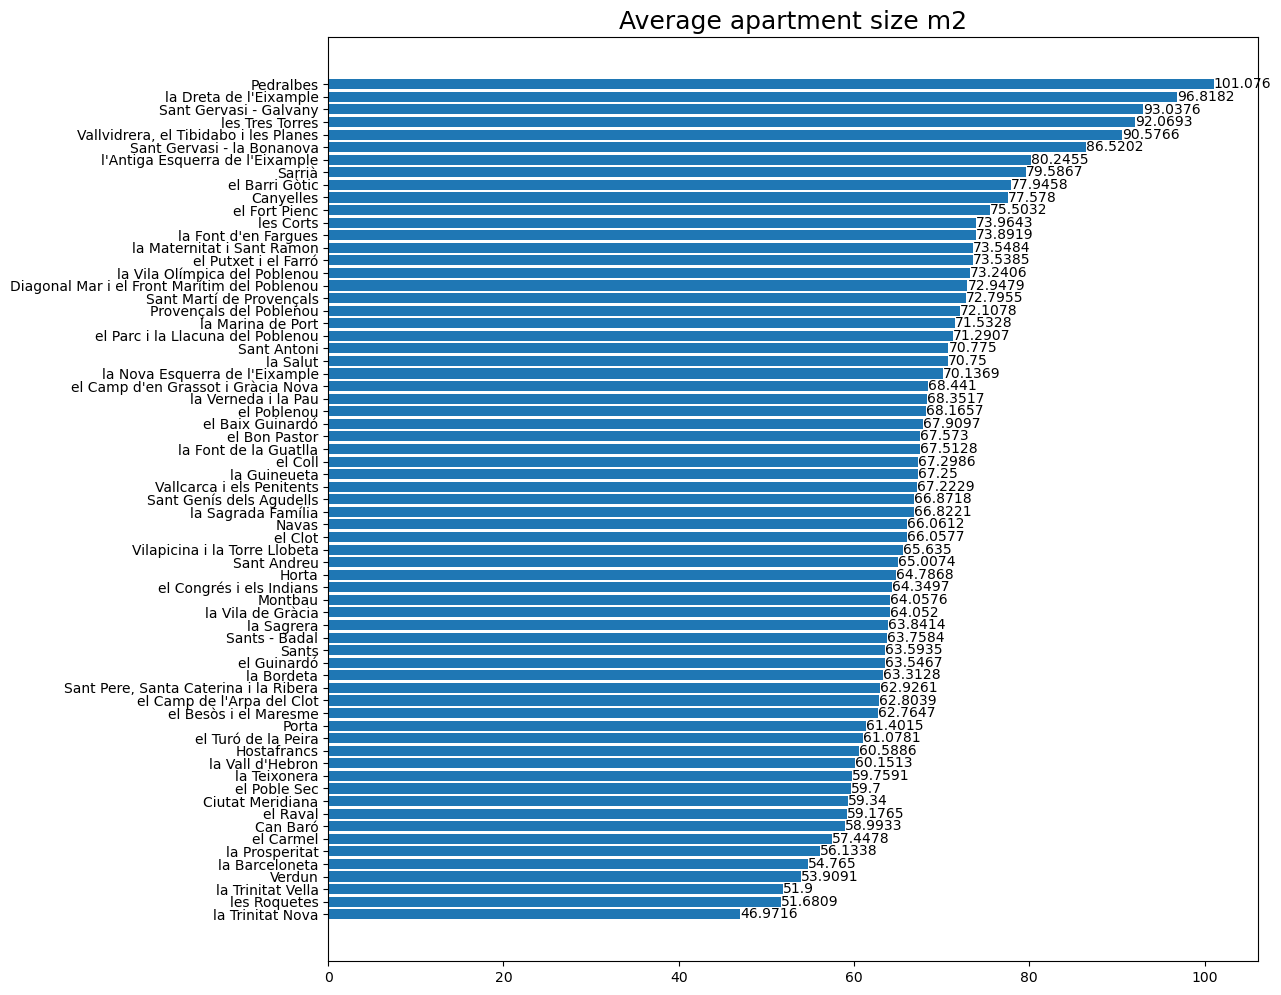

In [2119]:
fig, axs = plt.subplots(figsize=(12, 12))
any=2023
trim=2
mask = (price["Any"] == any) &(price["Trimestre"] == trim)
plot_dataframe =  price[mask].sort_values(by="m2")
bars=axs.barh(plot_dataframe['Nom_Barri'], plot_dataframe['m2'])
axs.bar_label(bars)
axs.set_title("Average apartment size m2",fontsize=18)
fig.savefig(media_folder + "barris_rank_m2.png")

In [2120]:
save_preprocessed(price, price_path)

Saving /home/luis/Documentos/python/jump2digital/data/price/prices_14_23.csv ....
Saved 2479 records with 9 columns


## <span style='color:red'> Accidents<br> </span><span style='color:green'> Accidentes<br></span><span style='color:blue'> Accidents<br></span>

### <span style='color:red'> Llegir i concatenar tots els fitxers d'accidents.<br> </span><span style='color:green'> Lectura y concatenación de los archivos de accidentes.<br></span><span style='color:blue'> Read and concatenate all accident files.<br></span>

In [2121]:
pd.set_option("display.width", 120)
accid = concat_files(accid_folder, range(2016, 2023),"_accidents_causa_conductor_gu_bcn_.csv")
#pd.concat(counts, axis=1)
print_head_tail(accid)

(10510, 20)
Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer',
       'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia',
       'Descripcio_torn', 'Descripcio_causa_conductor', 'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud',
       'Latitud'],
      dtype='object')
(11091, 20)
Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer',
       'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia',
       'Descripcio_torn', 'Descripcio_causa_conductor', 'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud',
       'Latitud'],
      dtype='object')
(10835, 20)
Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', 'Codi_carrer', 'Nom_carrer',
       'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_m

<span style='color:red'> Podem apreciar l'intercanvi d'informació entre el torn (Descripcio_torn ) i la causa (Descripcio_causa_conductor) i l'existència de dos noms de camps per a la causa (Descripcio_causa_conductor, Descripcio_causa_mediata): SOlucionem el problema aplicant una capçalera<br> </span><span style='color:green'> Podemos apreciar el intercambio de informacion entre el turno y la causa y la existencia de dos nombres de campos para la causa: SOlucionamoes el problema aplicando una cabecera comun a todos los archivos.<br></span><span style='color:blue'> We can see the exchange of information between the shift (Descripcio_torn) and the cause (Descripcio_causa_conductor) and the existence of two field names for the cause (Descripcio_causa_conductor, Descripcio_causa_mediata): We solve the problem by applying a common header to all files. <br></span>

In [2122]:
headers= ['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', 'Nom_barri', \
          'Codi_carrer', 'Nom_carrer', 'Num_postal ', 'Descripcio_dia_setmana', 'NK_Any', \
          'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Causa', 'Torn', \
          'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud', 'Latitud']
field_types = {'Codi_districte':int, \
                   'Codi_barri':int, \
                   'Codi_carrer':int, \
                   'NK_Any':int, \
                   'Mes_any':int, \
                   'Dia_mes':int, \
                   'Coordenada_UTM_X_ED50':np.float64, \
                   'Coordenada_UTM_Y_ED50':np.float64, \
                   'Longitud':np.float64, \
                   'Latitud':np.float64}
accid = concat_accid_files(data_folder=accid_folder, \
                           years=range(2016, 2023),\
                           common_name="_accidents_causa_conductor_gu_bcn_.csv", \
                           headers=headers, \
                           field_types=field_types)

In [2123]:
#print(accid.dtypes)

In [2124]:
print("Original Dataset has {} rows with {} columns.".format(accid.shape[0],accid.shape[1]))

Original Dataset has 69355 rows with 20 columns.


### <span style='color:red'> Estudi dels valors Nan<br> </span><span style='color:green'> Estudio de los valores nulos<br></span><span style='color:blue'> Study Nan values <br></span>

In [2125]:
count_NAN(accid)

|Numero_expedient = 0| |Codi_districte = 0| |Nom_districte = 0| |Codi_barri = 0| |Nom_barri = 0| |Codi_carrer = 0| |Nom_carrer = 1| |Num_postal  = 16|
|Descripcio_dia_setmana = 0| |NK_Any = 0| |Mes_any = 0| |Nom_mes = 0| |Dia_mes = 0| |Hora_dia = 0| |Causa = 0| |Torn = 0|
|Coordenada_UTM_X_ED50 = 0| |Coordenada_UTM_Y_ED50 = 0| |Longitud = 30| |Latitud = 30| 

In [2126]:
minus_one(accid)

|Numero_expedient = 0| |Codi_districte = 501| |Nom_districte = 0| |Codi_barri = 501| |Nom_barri = 0| |Codi_carrer = 646| |Nom_carrer = 0| |Num_postal  = 0|
|Descripcio_dia_setmana = 0| |NK_Any = 0| |Mes_any = 0| |Nom_mes = 0| |Dia_mes = 0| |Hora_dia = 0| |Causa = 0| |Torn = 0|
|Coordenada_UTM_X_ED50 = 30| |Coordenada_UTM_Y_ED50 = 30| |Longitud = 0| 

<span style='color:red'> Els 30 registres sense coordenades UTM tenen als camps Longitud i Latitud valors NAN i el barri i el carrer desconegut. Els esborrem.<br> </span><span style='color:green'> Los 30 registros sin coordenas UTM tiene en los campos Longitud y Latitud valores NAN y el barrio y la calle desconocida. Los borramos. <br></span><span style='color:blue'> The 30 records without UTM coordinates have NAN values and the unknown neighborhood and street in the Longitude and Latitude fields. We delete them. <br></span>

In [2127]:
drop_mask = (accid["Coordenada_UTM_X_ED50"] == -1) | (accid["Coordenada_UTM_Y_ED50"] == -1)
accid[drop_mask][["Nom_barri", "Nom_carrer","Coordenada_UTM_X_ED50", "Coordenada_UTM_Y_ED50", "Longitud",	"Latitud"]].head(30)


,Nom_barri,Nom_carrer,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
52129,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
52130,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
52131,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
52132,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
52133,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
52134,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
52135,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
53298,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
53299,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN
54395,Desconegut,Desconegut,-1.0,-1.0,NaN,NaN


In [2128]:
accid.drop(accid[drop_mask].index, inplace = True)
print("Dataset Without neighborhoods with NaNs has {} rows with {} columns.".format(accid.shape[0],accid.shape[1]))

Dataset Without neighborhoods with NaNs has 69325 rows with 20 columns.


<span style='color:red'> Vegem si tenim dades geogràfiques als barris desconeguts.<br> </span><span style='color:green'> Veamos si tenemos datos geograficos en los barrios desconocidos. <br></span><span style='color:blue'> Let's see if we have geographic data in the unknown neighborhoods. <br></span>

In [2129]:
drop_mask = (accid["Codi_barri"] == -1) 
accid[drop_mask][["Nom_barri", "Nom_carrer","Coordenada_UTM_X_ED50", "Coordenada_UTM_Y_ED50", "Longitud",	"Latitud"]].head(5).sort_values(by="Longitud")


,Nom_barri,Nom_carrer,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
1281,Desconegut,Desconegut,426830.03,4576250.78,2.124450,41.332574
1,Desconegut,ALMIRALL CERVERA / Sevilla ...,432316.21,4581276.81,2.154737,41.376367
2,Desconegut,NÚMERO 3 / E ...,427265.97,4576644.81,2.157427,41.381284
3,Desconegut,RDA DALT (BESÒS) ...,424991.14,4581760.18,2.157427,41.381284
0,Desconegut,NÚMERO 6 / A ...,427519.99,4575229.36,2.165891,41.375166


In [2130]:
accid[drop_mask][["Nom_barri", "Nom_carrer","Coordenada_UTM_X_ED50", "Coordenada_UTM_Y_ED50", "Longitud",	"Latitud"]].tail(5).sort_values(by="Longitud")

,Nom_barri,Nom_carrer,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
68190,Desconegut,Augusta ...,426355.48,4584211.14,2.117812,41.404227
68193,Desconegut,Joan XXIII ...,426451.50,4581657.08,2.119271,41.381232
68774,Desconegut,Arístides Maillol / Cardenal Reig ...,426465.56,4581445.06,2.119465,41.379324
68191,Desconegut,Corts / Comte de Güell ...,426676.50,4581334.04,2.122001,41.378343
68192,Desconegut,Guipúscoa ...,433835.76,4586344.61,2.207062,41.424093


In [2131]:
#Create a copy of records with unkown neighborhoods

unkown= accid[drop_mask]
unkown_barris = unkown.loc[:,('Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri', \
                              'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal ', 'Descripcio_dia_setmana', \
                              'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Causa', 'Torn', \
                              'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50', 'Longitud', 'Latitud')]
unkown_barris.shape
#remove records with with unkown neighborhoods from original data set.
accid.drop(accid[drop_mask].index, inplace = True)


<span style='color:red'> Intentarem inferir els noms i els codis dels barris a partir de les coordenades UTM i d'un shapefile amb els barris de la ciutat.<br> </span><span style='color:green'> Intentaremos inferir los nombres y códigos de los barrios a partir de las coordenadas UTM y de un shapefile con los barrios de la ciudad.<br></span><span style='color:blue'> We will try to infer the names and codes of the neighborhoods from the UTM coordinates and a shapefile with the city's neighborhoods. <br></span>

In [2132]:
# Loading Barcelona's Shapefile.
bcn_barris_shapes = gpd.read_file(shape_path, encoding='utf-8')
print("The coordinate reference system for this shapefile is {}".format(bcn_barris_shapes.crs))

The coordinate reference system for this shapefile is EPSG:25831


In [2133]:
#let's simplify shapefile to hold only fields interesting for this job.
bcn_barris_shapes = bcn_barris_shapes[[ 'DISTRICTE', 'BARRI', 'NOM', 'geometry']]

In [2134]:
#with utm coordinates create a POINT() as the geometry field
unkown_barris["geometry"] = gpd.GeoSeries.from_xy(x=unkown_barris.Coordenada_UTM_X_ED50, y=unkown_barris.Coordenada_UTM_Y_ED50, crs="EPSG:25831")
#Transform DataFrame into a GeoDataFrame
geo_unkown_barris = gpd.GeoDataFrame(unkown_barris, geometry='geometry')
geo_unkown_barris.shape

(471, 21)

In [2135]:
#Look for shapes that contain the accident geo point. It mades a left join, regularly resulti less records cause some of them do not fit in any shape.
found_barris=gpd.sjoin(geo_unkown_barris, bcn_barris_shapes, predicate = 'within')
found_barris.shape


(434, 25)

<span style='color:red'> Hem tingut èxit amb 434 registres d'accidents..<br> </span><span style='color:green'> Hemos tenido éxito con 434 registros de accidentes.<br></span><span style='color:blue'> We have been successful with 434 accident records. <br></span>

In [2136]:
#Copy information from Shapefile's fields to correspondign accid-dataset's field
found_barris["Codi_districte"]=found_barris["DISTRICTE"]
found_barris["Codi_barri"]=found_barris["BARRI"]
found_barris["Nom_barri"]=found_barris["NOM"]
#remove joined columns
found_barris.drop("geometry", axis=1, inplace=True)
found_barris.drop("index_right", axis=1, inplace=True)
found_barris.drop("DISTRICTE", axis=1, inplace=True)
found_barris.drop("BARRI", axis=1, inplace=True)
found_barris.drop("NOM", axis=1, inplace=True)

found_barris.shape


(434, 20)

In [2137]:
#append recovered data into the original dataset.
accid = pd.concat([accid, found_barris], ignore_index=True)


In [2138]:
#Check if did not miss relevant data: Neither Street name nor postal code are relevant for PCA
minus_one(accid)


|Numero_expedient = 0| |Codi_districte = 0| |Nom_districte = 0| |Codi_barri = 0| |Nom_barri = 0| |Codi_carrer = 579| |Nom_carrer = 0| |Num_postal  = 0|
|Descripcio_dia_setmana = 0| |NK_Any = 0| |Mes_any = 0| |Nom_mes = 0| |Dia_mes = 0| |Hora_dia = 0| |Causa = 0| |Torn = 0|
|Coordenada_UTM_X_ED50 = 0| |Coordenada_UTM_Y_ED50 = 0| |Longitud = 0| 

In [2139]:
count_NAN(accid)

|Numero_expedient = 0| |Codi_districte = 0| |Nom_districte = 0| |Codi_barri = 0| |Nom_barri = 0| |Codi_carrer = 0| |Nom_carrer = 1| |Num_postal  = 15|
|Descripcio_dia_setmana = 0| |NK_Any = 0| |Mes_any = 0| |Nom_mes = 0| |Dia_mes = 0| |Hora_dia = 0| |Causa = 0| |Torn = 0|
|Coordenada_UTM_X_ED50 = 0| |Coordenada_UTM_Y_ED50 = 0| |Longitud = 0| |Latitud = 0| 

In [2140]:
print("Dataset Without neighborhoods with NaNs has {} rows with {} columns.".format(accid.shape[0],accid.shape[1]))

Dataset Without neighborhoods with NaNs has 69288 rows with 20 columns.


In [2141]:
print_head_tail(accid)

      Numero_expedient Codi_districte Nom_districte Codi_barri                   Nom_barri  Codi_carrer  \
0      2016S002566                 10    Sant Martí         64  el Camp de l'Arpa del Clot       283200   
1      2016S008866                 10    Sant Martí         64  el Camp de l'Arpa del Clot       283200   
2      2016S003312                 10    Sant Martí         64  el Camp de l'Arpa del Clot       283200   
69285  2022S003346                 08    Desconegut         51                      Verdun           -1   
69286  2022S007763                 07    Desconegut         39    Sant Genís dels Agudells           -1   
69287  2022S001574                 05    Desconegut         23                      Sarrià           -1   

                                              Nom_carrer Num_postal  Descripcio_dia_setmana  NK_Any  Mes_any  \
0                                               Ripollès   0093 0093                Dimarts    2016        4   
1                         

### <span style='color:red'> Agregació trimestral dels accidents<br> </span><span style='color:green'> Agregación trimestral de los accidentes <br></span><span style='color:blue'> Quarterly aggregation of accidents <br></span>

In [2142]:
#Create a column for quarters
accid=accid.assign(
    Trimestre=accid[["Mes_any"]].apply(
        lambda row: ((row -1)//3)+1),axis=1)
#create a key column to merge the results into the price table
accid=accid.assign(
    Clau=accid[["Codi_barri", "NK_Any", "Trimestre"]].apply(
        lambda row: ''.join([str(each) for each in row]),axis=1))

In [2143]:
#Count number of records per key. A key relates to Neighborhood, year,  quarter
grouped_accid = accid.groupby("Clau",group_keys=False)
counted_quarter = grouped_accid.size()

In [2144]:
#Count number of records per key and shift.
grouped_accid = accid.groupby(["Clau","Torn"],group_keys=False)
counted_quarted_torn = grouped_accid.size().unstack()

In [2145]:
#Set zero Nan values resulting from no accidents in a (key, shift) combination
counted_quarted_torn.fillna(0, inplace=True)
print_head_tail(counted_quarted_torn)

Torn     Matí   Nit  Tarda
Clau                      
0320163   1.0   0.0    0.0
0320193   0.0   0.0    1.0
0420173   0.0   0.0    1.0
920222   27.0   6.0   42.0
920223   37.0  15.0   35.0
920224   34.0  12.0   42.0


In [2146]:
#Split unstacked aggregation into a pandas data serie for each new column of the summary dataFrame
mat = [x[0] for x in counted_quarted_torn.values]
nit = [x[1] for x in counted_quarted_torn.values]
tar = [x[2] for x in counted_quarted_torn.values]
# Create three new pandas data Series holding accidents by shift in % of accidents for day.
mat_perc = [x[0]/sum(x) for x in counted_quarted_torn.values]
nit_perc = [x[1]/sum(x) for x in counted_quarted_torn.values]
tar_perc = [x[2]/sum(x) for x in counted_quarted_torn.values]

In [2147]:
accidents_by_quarter_and_torn=pd.DataFrame({"Clau":counted_quarter.index, \
                                             "Accidents":counted_quarter.values, \
                                             "Mat":mat, \
                                             "Tar":tar, \
                                             "Nit":nit, \
                                             "Mat_P":mat_perc, \
                                             "Tar_p":tar_perc, \
                                             "Nit_p":nit_perc,})

In [2148]:
print_head_tail(accidents_by_quarter_and_torn)

         Clau  Accidents   Mat   Tar   Nit     Mat_P     Tar_p     Nit_p
0     0320163          1   1.0   0.0   0.0  1.000000  0.000000  0.000000
1     0320193          1   0.0   1.0   0.0  0.000000  1.000000  0.000000
2     0420173          1   0.0   1.0   0.0  0.000000  1.000000  0.000000
2043   920222         75  27.0  42.0   6.0  0.360000  0.560000  0.080000
2044   920223         87  37.0  35.0  15.0  0.425287  0.402299  0.172414
2045   920224         88  34.0  42.0  12.0  0.386364  0.477273  0.136364


In [2149]:
save_preprocessed(accidents_by_quarter_and_torn, accid_path)

Saving /home/luis/Documentos/python/jump2digital/data/accid/accidents_trimestrals_16_22.csv ....
Saved 2046 records with 8 columns


 <span style='color:red'> Com a curiositat, vegem l'evolució dels accidents en el temps. <br> </span><span style='color:green'> A modo de curiosidad veamos la evolución de los accidentes en el tiempo.<br></span><span style='color:blue'> As a curiosity, let's look at the evolution of accidents over time. <br></span>

In [2150]:
grouped_accid = accid.groupby("NK_Any",group_keys=False)
counted_year = grouped_accid.size()

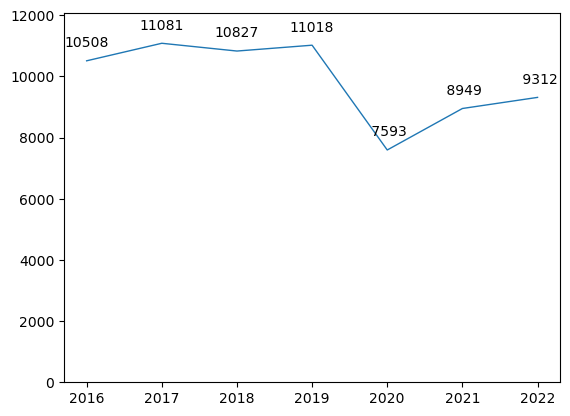

In [2151]:
fig, ax = plt.subplots()
xs = counted_year.index
ys = counted_year.values
plt.ylim([0, math.ceil(1000 + ys.max())])
ax.plot(xs, ys , linewidth=1.0)

for x,y in zip(xs,ys):

    label = "{:5}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center




plt.show()


In [2152]:
print_head_tail(accid)

      Numero_expedient Codi_districte Nom_districte Codi_barri                   Nom_barri  Codi_carrer  \
0      2016S002566                 10    Sant Martí         64  el Camp de l'Arpa del Clot       283200   
1      2016S008866                 10    Sant Martí         64  el Camp de l'Arpa del Clot       283200   
2      2016S003312                 10    Sant Martí         64  el Camp de l'Arpa del Clot       283200   
69285  2022S003346                 08    Desconegut         51                      Verdun           -1   
69286  2022S007763                 07    Desconegut         39    Sant Genís dels Agudells           -1   
69287  2022S001574                 05    Desconegut         23                      Sarrià           -1   

                                              Nom_carrer Num_postal  Descripcio_dia_setmana  NK_Any  ...  Hora_dia  \
0                                               Ripollès   0093 0093                Dimarts    2016  ...         7   
1             

In [2153]:
grouped_accid = accid.groupby(["Nom_barri","NK_Any"],group_keys=False)
counted_quarted_torn = grouped_accid.size().unstack()

In [2154]:
counted_quarted_torn.fillna(0, inplace=True)

In [2155]:
counted_quarted_torn

NK_Any,2016,2017,2018,2019,2020,2021,2022
Nom_barri,,,,,,,
Baró de Viver,7.0,26.0,31.0,24.0,22.0,28.0,25.0
Can Baró,25.0,17.0,15.0,18.0,11.0,21.0,12.0
Can Peguera,29.0,17.0,10.0,6.0,2.0,4.0,7.0
Canyelles,0.0,29.0,47.0,47.0,22.0,46.0,33.0
Ciutat Meridiana,9.0,14.0,14.0,10.0,14.0,9.0,15.0
Diagonal Mar i el Front Marítim del Poblenou,68.0,139.0,131.0,130.0,64.0,95.0,134.0
Horta,107.0,157.0,164.0,141.0,101.0,139.0,144.0
Hostafrancs,84.0,125.0,139.0,164.0,128.0,114.0,119.0
Montbau,44.0,54.0,64.0,44.0,43.0,42.0,32.0


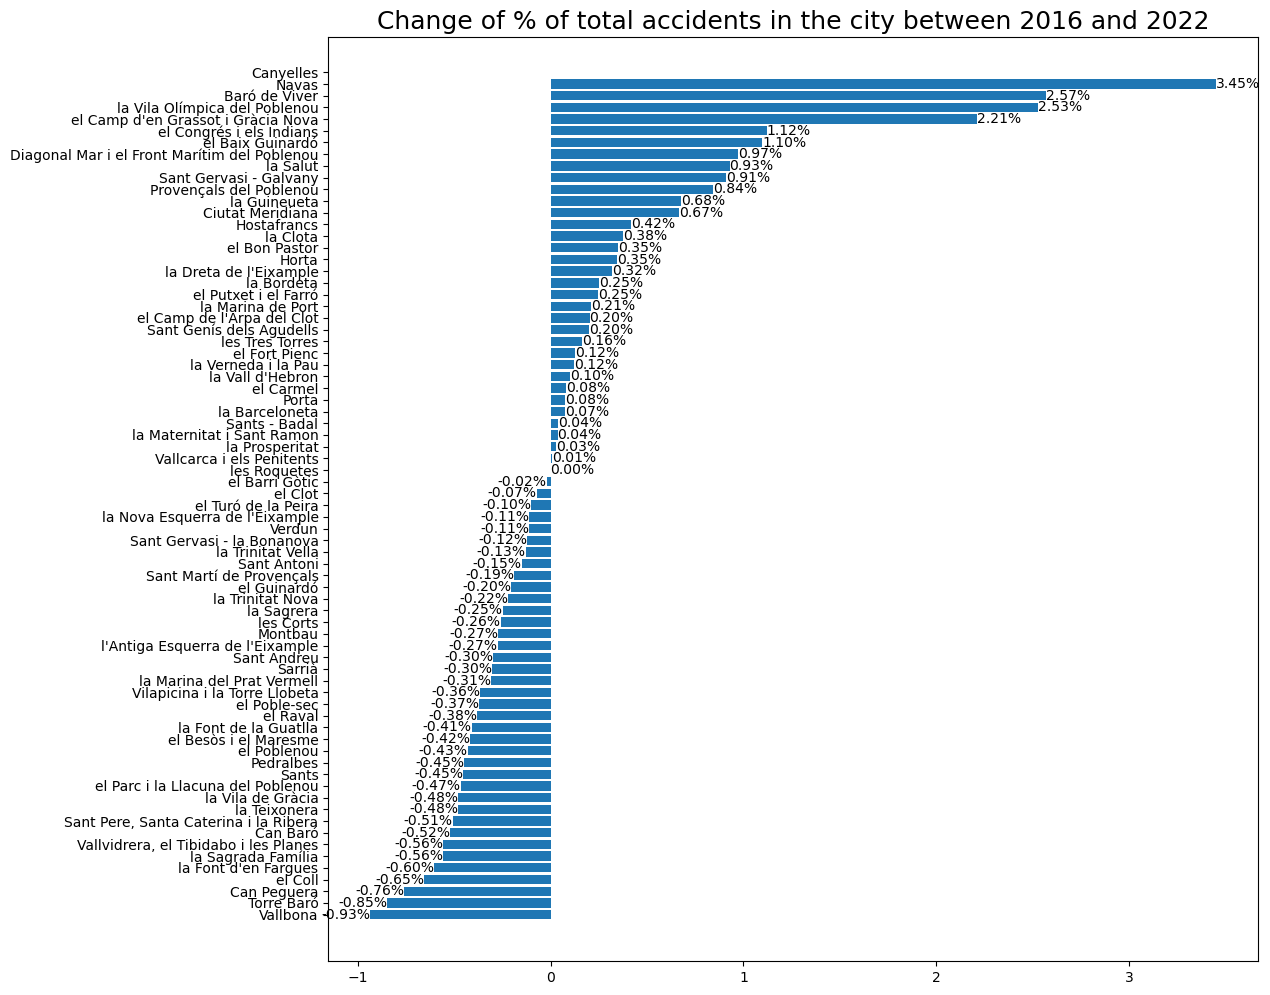

In [2156]:
acc_2016 = counted_quarted_torn[2016]
acc_2022 = counted_quarted_torn[2022]
rate_22_16 = (acc_2022 / acc_2016) -1

fig, axs = plt.subplots(figsize=(12, 12))
plot_dataframe =  rate_22_16.sort_values()
bars = axs.barh(plot_dataframe.index, plot_dataframe.values)
axs.bar_label(bars, fmt='{:.2f}%')
axs.set_title("Change of % of total accidents in the city between 2016 and 2022",fontsize=18)
fig.savefig(media_folder + "barris_change_accidentes.png")

# <span style='color:red'>Creació del model de dades (Fusionar).<br> </span><span style='color:green'>Creación del modelo de datos (Unir).<br></span><span style='color:blue'> Data model creation (Merge).<br></span>

### <span style='color:red'> Unint preus i accidents.<br> </span><span style='color:green'> Uniendo precios y accidentes.<br></span><span style='color:blue'> Joining prices and accidents.<br></span>

In [2157]:
#defining dtypes i save 32% of memory.
#Use to checkit sum(list(price.memory_usage()))
price_types = {"Any":np.uint16,"Trimestre":np.uint8,"Nom_Districte":str,"Nom_Barri":str,"Eur":np.float32,"Clau":str,"Eur_m2":np.float32,"Date":str}
price = pd.read_csv(price_path, dtype = price_types)
price.shape

(2479, 9)

In [2158]:
#defining dtypes i save 61% of memory.
#Use to checkit sum(list(price.memory_usage()))
accid_types = {"Clau":str,"Accidents":np.uint16,"Mat":np.uint8,"Tar":np.uint8,"Nit":np.uint8,"Mat_P":np.float32,"Tar_p":np.float32,"Nit_p":np.float32}
accid = pd.read_csv(accid_path, dtype = accid_types)
accid.shape

(2046, 8)

In [2159]:
raw_model = pd.merge(price, accid, on="Clau")
print_head_tail(raw_model)

       Any  Trimestre Nom_Districte                 Nom_Barri          Eur     Clau     Eur_m2        Date         m2  \
0     2016          1  Ciutat Vella                  el Raval   624.419983   120161  11.650000  2016-01-01  53.598283   
1     2016          1  Ciutat Vella            el Barri Gòtic   893.419983   220161  13.470000  2016-01-01  66.326652   
2     2016          1  Ciutat Vella            la Barceloneta   638.750000   320161  17.299999  2016-01-01  36.921965   
1799  2022          3    Sant Martí   Provençals del Poblenou  1059.400024  7120223  14.800000  2022-07-01  71.581081   
1800  2022          3    Sant Martí  Sant Martí de Provençals  1158.900024  7220223  12.300000  2022-07-01  94.219512   
1801  2022          3    Sant Martí       la Verneda i la Pau   775.799988  7320223  11.500000  2022-07-01  67.460870   

      Accidents  Mat  Tar  Nit     Mat_P     Tar_p     Nit_p  
0            61   21   29   11  0.344262  0.475410  0.180328  
1            32   17   12 

<span style='color:red'> Elecció de columnes.<br> </span><span style='color:green'> Selección de columnas.<br></span><span style='color:blue'> choice of columns.<br></span>

In [2160]:
pca_model = raw_model[["Nom_Barri",	"Any", "Trimestre", "Eur","m2", "Accidents"]]
print_head_tail(pca_model)

                     Nom_Barri   Any  Trimestre          Eur         m2  Accidents
0                     el Raval  2016          1   624.419983  53.598283         61
1               el Barri Gòtic  2016          1   893.419983  66.326652         32
2               la Barceloneta  2016          1   638.750000  36.921965         34
1799   Provençals del Poblenou  2022          3  1059.400024  71.581081         23
1800  Sant Martí de Provençals  2022          3  1158.900024  94.219512         12
1801       la Verneda i la Pau  2022          3   775.799988  67.460870         20


In [2161]:
save_preprocessed(pca_model, model_path)

Saving /home/luis/Documentos/python/jump2digital/data/model/pca_model.csv ....
Saved 1802 records with 6 columns


# <span style='color:red'> Anàlisi de components principals (PCA).<br> </span><span style='color:green'> Análisis de Componentes principales (PCA).<br></span><span style='color:blue'> Principal Components Analysis (PCA).<br></span>

In [2162]:
#defining dtypes i save 65% of memory.
#Use  sum(list(price.memory_usage())) to check it
model_types = {"Nom_Barri":str,"Any":np.uint16,"Trimestre":np.uint8,"Eur":np.float32,"Eur_m2":np.float32,"Mat":np.uint8,"Tar":np.uint8,"Nit":np.uint8}
model = pd.read_csv(model_path, dtype=model_types)
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom_Barri  1802 non-null   object 
 1   Any        1802 non-null   uint16 
 2   Trimestre  1802 non-null   uint8  
 3   Eur        1802 non-null   float32
 4   m2         1802 non-null   float64
 5   Accidents  1802 non-null   int64  
dtypes: float32(1), float64(1), int64(1), object(1), uint16(1), uint8(1)
memory usage: 54.7+ KB


<span style='color:red'> Filtrage de dades(tercer trimestre de 2022).<br> </span><span style='color:green'> Filtrado de datos (tercer trimestre de 2022).<br></span><span style='color:blue'> Data filtering (Third quarter of 2022).<br></span>

In [2163]:
#How many records do we have in each quarter
grouped = model.groupby(["Any", "Trimestre"],group_keys=False)
counted_quarter = grouped.size().unstack()
counted_quarter

Trimestre,1,2,3,4
Any,,,,
2016,66.0,66.0,66.0,66.0
2017,66.0,67.0,67.0,67.0
2018,67.0,67.0,67.0,67.0
2019,67.0,67.0,67.0,67.0
2020,67.0,66.0,67.0,67.0
2021,67.0,67.0,67.0,66.0
2022,67.0,67.0,67.0,NaN


In [2164]:
pca_year = 2019
pca_quarter = 2
model_mask = (model.Any == pca_year) & (model.Trimestre == pca_quarter)
data =model[model_mask].sort_values(by=["Nom_Barri"])
data

,Nom_Barri,Any,Trimestre,Eur,m2,Accidents
898,Can Baró,2019,2,764.500000,58.807692,5
911,Canyelles,2019,2,756.400024,81.333333,14
916,Ciutat Meridiana,2019,2,559.799988,59.553191,1
928,Diagonal Mar i el Front Marítim del Poblenou,2019,2,1388.099976,86.217391,34
906,Horta,2019,2,760.599976,62.859504,36
879,Hostafrancs,2019,2,824.200012,61.969925,43
904,Montbau,2019,2,802.400024,68.581197,10
922,Navas,2019,2,836.900024,69.165289,24
885,Pedralbes,2019,2,1746.699951,118.020270,57
908,Porta,2019,2,775.299988,63.549180,20


### <span style='color:red'> Escalat de les variables<br> </span><span style='color:green'> Escalado de las variables <br></span><span style='color:blue'> Variable scaling <br></span>

In [2165]:
#Numeric data starts in 4th column with "Eur"
data.loc[:,data.columns[3]:data.columns[-1]].mean(axis=0)

Eur          922.489624
m2            68.969715
Accidents     41.507463
dtype: float64

In [2166]:
data.loc[:, data.columns[3]:data.columns[-1]].var(axis=0)

Eur          56402.097656
m2             122.258961
Accidents     2364.405246
dtype: float64

<span style='color:red'> Les diferències entre les mitjanes i les variàncies de les variables suggereixen escalar les variables.<br> </span><span style='color:green'> Las diferencias entre las medias y las varianzas de cada variable sugieren su escalado. <br></span><span style='color:blue'> The differences between the means and variances of the variables suggest scaling the variables. <br></span>

In [2167]:
#Split data set into numeric data and label(barri)
numeric_data=data.loc[:,data.columns[3]:data.columns[-1]]
barris = data.loc[:,"Nom_Barri"].sort_values()
#how many differente barris do we have. 
num_barris = len(barris.unique())
#Data standarization
std_numeric_data = StandardScaler().fit_transform(numeric_data)
#How many variables do we have
num_vars = std_numeric_data.shape[1]

<span style='color:red'> Matriu de covariances i càlcul dels seus vectors i valors propis.<br> </span><span style='color:green'> Matriz de covarianzas y cálculo de sus vectors y valores propios. <br></span><span style='color:blue'> Covariance matrix and calculation of its einge vectors and values. <br></span>

In [2168]:
cov_mat=np.cov(std_numeric_data.T)
print('Covariance Matrix \n%s' %cov_mat)

Covariance Matrix 
[[1.01515152 0.86874959 0.40346216]
 [0.86874959 1.01515152 0.37450828]
 [0.40346216 0.37450828 1.01515152]]


In [2169]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.63946575 -0.71335699 -0.28671479]
 [-0.63316521  0.70018244 -0.32991873]
 [-0.43610249  0.0294339   0.89941551]]

Eigenvalues 
[2.15049437 0.14579902 0.74916115]


In [2170]:
#  List of couples (eingevalue, eingevector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Descendent sorted by eingevalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Total variance inside eingevalues
sum_eig_vals = sum(eig_vals)
acum_perc = 0
# Table showing variance explained by each eingevector
print('num\teingevalue\t\t%\t∑%')
for i, val in enumerate(eig_pairs):
    perc = val[0]/sum_eig_vals
    acum_perc += perc
    print("{}\t{}\t{:.2f}\t{:.2f}".format(i,val[0],perc, acum_perc ))

num	eingevalue		%	∑%
0	2.150494373003116	0.71	0.71
1	0.7491611477138882	0.25	0.95
2	0.1457990247375406	0.05	1.00


<span style='color:red'> Dos components principals contenen el 89% de la informació.<br> </span><span style='color:green'> Dos componentes principales contiene el 89% de la información. <br></span><span style='color:blue'> Two principal components contain 89% of the information. <br></span>

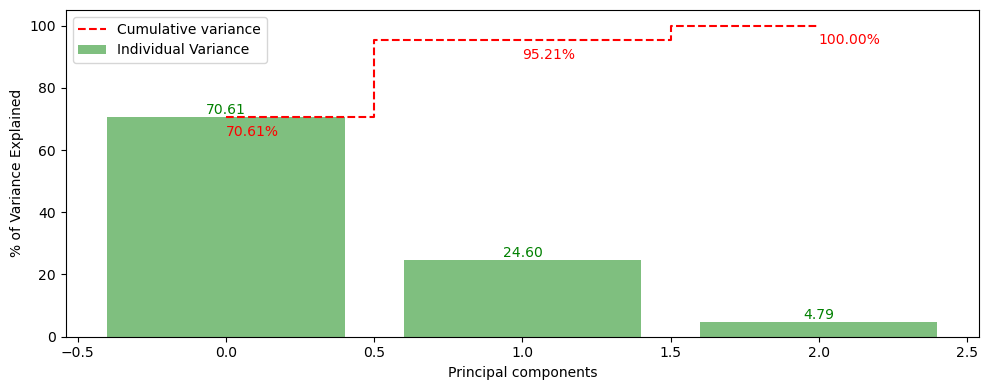

<Figure size 640x480 with 0 Axes>

In [2171]:
import matplotlib.pyplot as plt
# Chart showing variance explained by each eingevectror
var_exp = [(i / sum_eig_vals)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Bar chart of variance per eingevector & step chart with cumulative variance by eingevector
with plt.style.context('seaborn-v0_8-pastel'):
    plt.figure(figsize=(10, 4))

    p=plt.bar(range(num_vars), var_exp, alpha=0.5, align='center',
            label='Individual Variance', color='g')
    plt.bar_label(p, label_type='edge', fmt='%.2f', color='g')
    plt.step(range(num_vars), cum_var_exp, where='mid', linestyle='--', label='Cumulative variance', color='r')
    [plt.text(i, j-6, f'{j:.2f}%', color='r') for (i, j) in zip(range(num_vars), cum_var_exp)]
    plt.ylabel('% of Variance Explained')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    plt.savefig(media_folder + "EingeValues_variance.png")

<span style='color:red'> Comportament de les variables en els components.(factors de càrrega).<br> </span><span style='color:green'>Comportamiento de las variables en las componentes(coeficientes). <br></span><span style='color:blue'> Behavior of the variables inside the components (loading factors). <br></span>

In [2172]:
#Eingevectors with shape 1 x num_vars are reshaped to num_vars x 1. 
#"Vertical" eingevectors are pasted together to form de "proyection Matrix"

matrix_w = np.hstack((eig_pairs[0][1].reshape(num_vars,1),
                      eig_pairs[1][1].reshape(num_vars,1)))
#Load factors visualization
coeficients= zip(numeric_data.columns.tolist(),matrix_w)
print("Var\t\tPC-x\t PC-y")
for var, pcs in coeficients:
    print("{:12}\t{:.2f}\t{:6.2f}".format(var, pcs[0], pcs[1] ))


Var		PC-x	 PC-y
Eur         	-0.64	 -0.29
m2          	-0.63	 -0.33
Accidents   	-0.44	  0.90


<span style='color:red'> Al component principal pesen més els accidents que els preus. Al component segon els preus sumen i els accidents resten.<br> </span><span style='color:green'>En el componente principal pesan más los accidentes que los precios. En el componente segundo los precios suman y los accidentes restan. <br></span><span style='color:blue'> In the main component, accidents weigh more than prices. In the second component, prices add and accidents subtract. <br></span>

In [2173]:
#data proyection on new ortogonal axes.
print("full data x matrix  = reduced data")
print(std_numeric_data.shape, "  x",matrix_w.shape, " = ({}, {})".format(std_numeric_data.shape[0],matrix_w.shape[1]))
components = std_numeric_data.dot(matrix_w)

full data x matrix  = reduced data
(67, 3)   x (3, 2)  = (67, 2)


In [2174]:
#get min_max from each componente to set axis limits
import math
min_x, max_x = (math.floor(components[:,0].min()), math.ceil(components[:,0].max()))
min_y, max_y = (math.floor(components[:,1].min()), math.ceil(components[:,1].max()))

In [2175]:
#generated with http://medialab.github.io/iwanthue/
# Color      one         two        three     four       five       six
#2345678901234567890123456789012345678901234567890123456789012345678901234567890
#        1         2         3         4         5         6         7         8 
# 73 colors

all_colors = ["#e576b7", "#54c34e", "#8458d9", "#93c23c", "#3959cf", "#c5b63b", \
              "#457bed", "#91a936", "#9e42b8", "#489932", "#c83aa2", "#4fce8d", \
              "#e272d8", "#45a867", "#c578e8", "#6c892c", "#8974e4", "#e69c37", \
              "#664db1", "#92bc6c", "#bb2772", "#55cebc", "#e13365", "#3a7a33", \
              "#e84a90", "#367949", "#db3941", "#50c1e3", "#e15d29", "#4a92eb", \
              "#b78629", "#476ac2", "#b35d1f", "#9a8ce4", "#4c6a18", "#8f5cb6", \
              "#90832e", "#6e4996", "#c0b46f", "#9a4190", "#60ad85", "#b12e4b", \
              "#33a29e", "#ab3422", "#3b8dbb", "#de6550", "#3868a9", "#ec8c62", \
              "#5d5ca7", "#695f17", "#d293d6", "#4d662b", "#aa3b6e", "#24765a", \
              "#e25e73", "#699ad9", "#815a16", "#aaa4e3", "#8a4722", "#4a5589", \
              "#d59d6a", "#726da6", "#849357", "#975b9b", "#726c37", "#e2799a", \
              "#9d6b3c", "#bd76a4", "#b0584c", "#8d476f", "#e58c8c", "#8d3f52", \
              "#ae5b6a"]

unsorted_colors = all_colors[:num_barris]
colors = sorted(unsorted_colors)

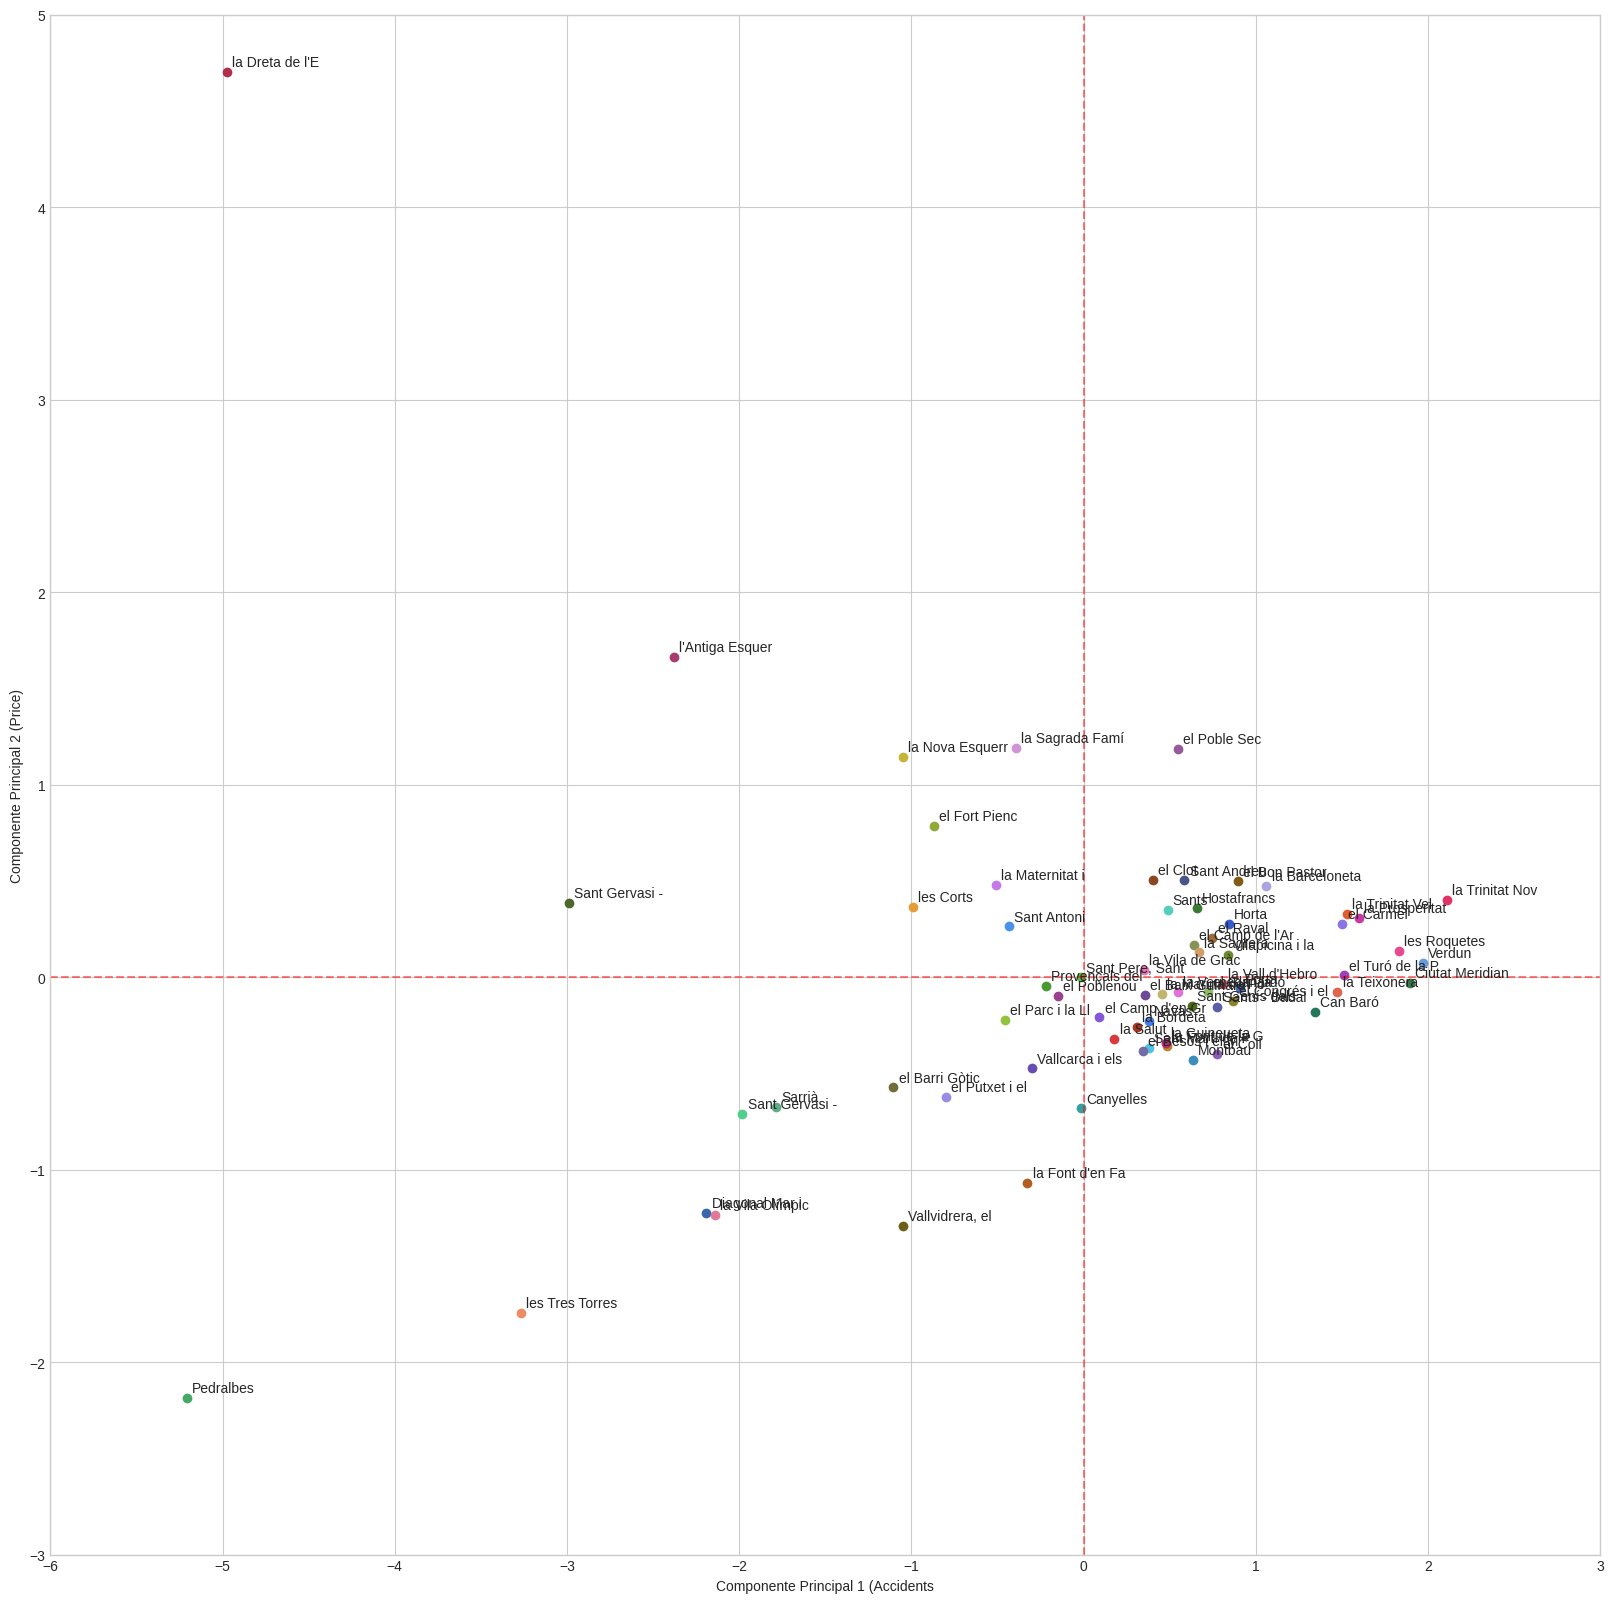

In [2176]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig = plt.figure(figsize=(20, 20))
    for lab, col in zip(barris, colors):
        x = components[barris==lab, 0]
        y = components[barris==lab, 1]
        plt.scatter(x, y, label=lab, c=col)
        plt.text(x + 0.03, y + 0.03, lab[:15], fontsize=10)
    plt.xlabel('Componente Principal 1 (Accidents')
    plt.ylabel('Componente Principal 2 (Price)')
    plt.ylim(min_y,max_y)
    plt.xlim(min_x,max_x)
    plt.axvline(x = 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.axhline(y= 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.show()
    fig.savefig(media_folder + "pca_barris.png")